In [176]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Data Reading & Data Types 

In [177]:
df = pd.read_csv("train.csv")

In [178]:
df.shape

(1460, 81)

In [179]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

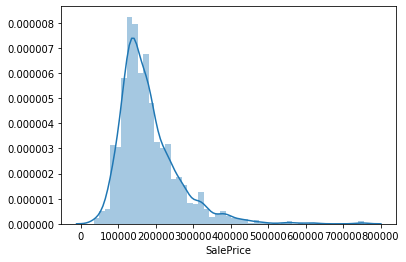

In [181]:
# Lets look at the distribution of the Target variable

sns.distplot(df['SalePrice']);

In [182]:
from scipy import stats
df['SalePrice'].skew()

1.8828757597682129

In [183]:
df['SalePrice'].kurtosis()

6.536281860064529

The target vaiable is right screwed

In [184]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [185]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [186]:
# dropping ID 
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [187]:
# correlation matrix
cor = df_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


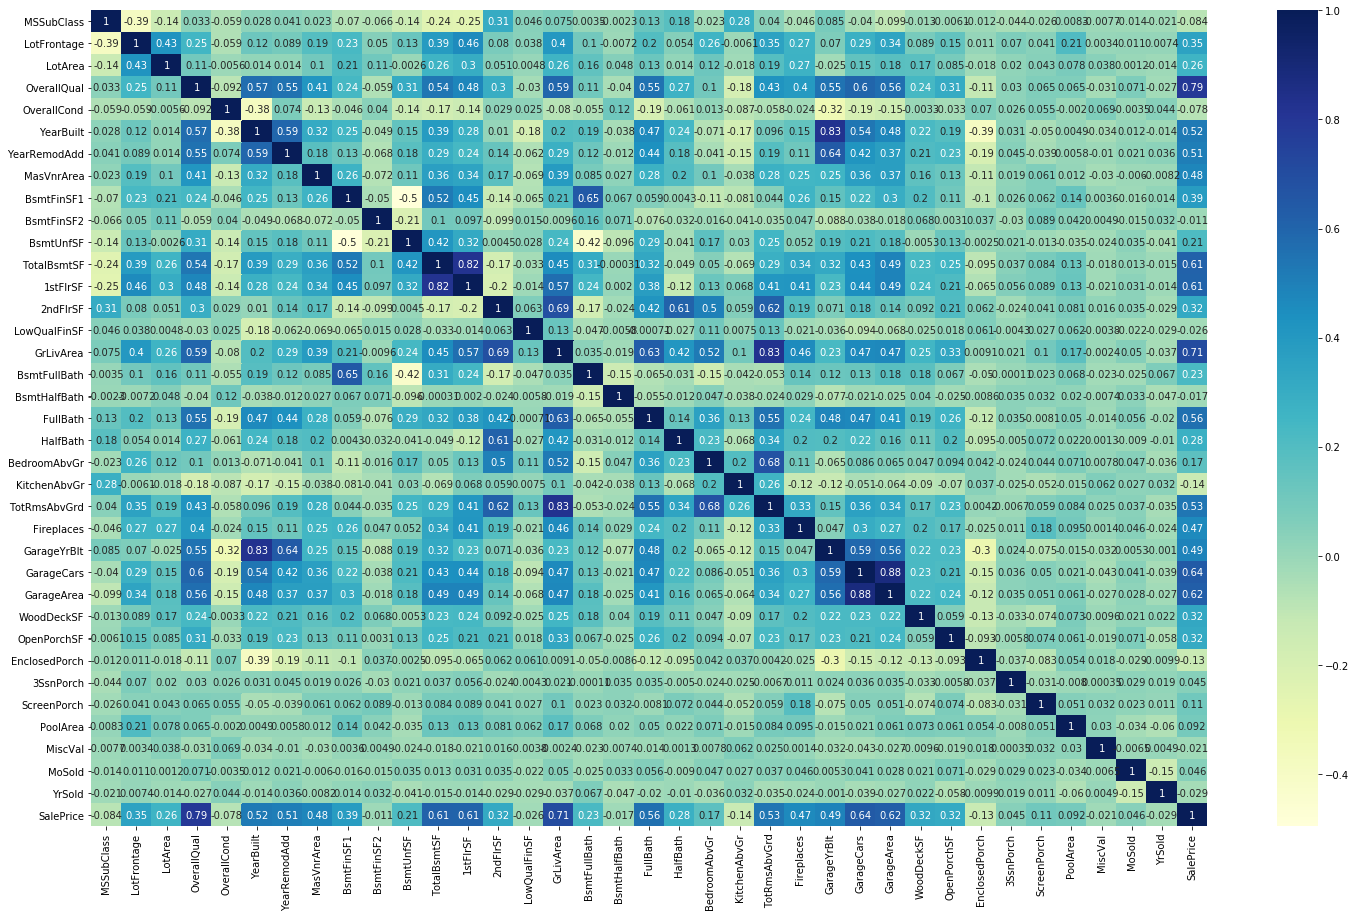

In [188]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Bivariate Analysis

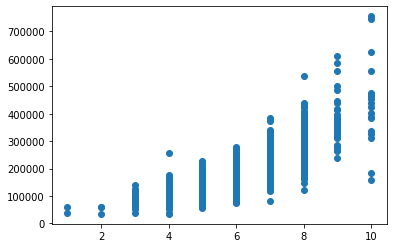

In [189]:
plt.scatter(x=df['OverallQual'], y=df['SalePrice']);

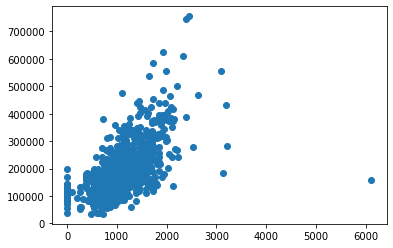

In [190]:
plt.scatter(x=df['TotalBsmtSF'], y=df['SalePrice']);

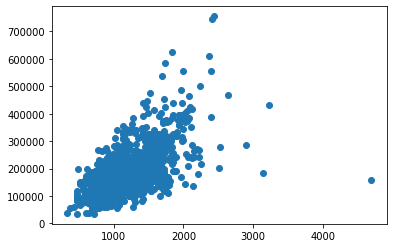

In [191]:
plt.scatter(x=df['1stFlrSF'], y=df['SalePrice']);

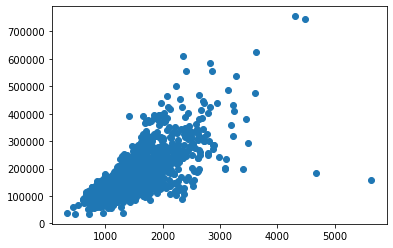

In [192]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice']);

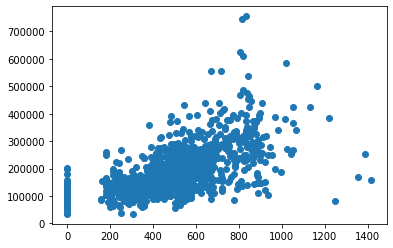

In [193]:
plt.scatter(x=df['GarageArea'], y=df['SalePrice']);

## Missing Values


In [194]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 110)

In [195]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum())/(df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In description we can see that NA values have some meaning.
We will impute these NA values with 'None'

In [196]:
null_have_meaning = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'] # Identify all in ur dataset

In [197]:
for i in null_have_meaning:
    df[i].fillna("None", inplace=True)

In [198]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum())/(df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


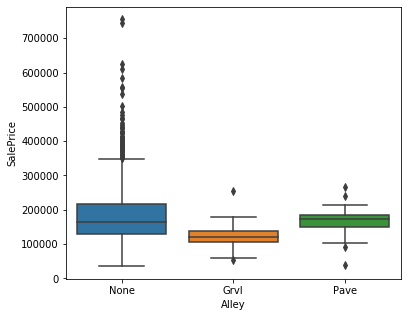

In [199]:
# Box plot

f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['Alley'], y=df['SalePrice']);

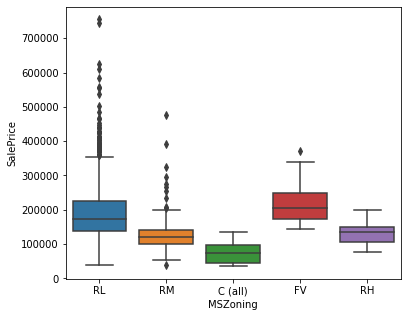

In [200]:
# Box plot

f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['MSZoning'], y=df['SalePrice']);

In [201]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

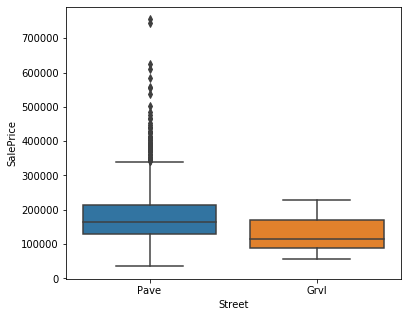

In [202]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['Street'], y=df['SalePrice']);

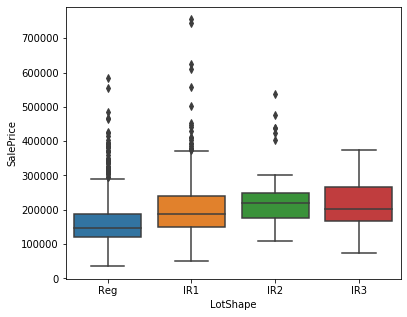

In [203]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['LotShape'], y=df['SalePrice']);

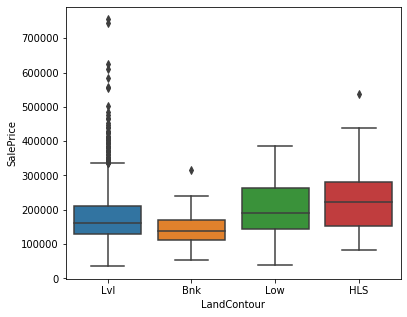

In [204]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['LandContour'], y=df['SalePrice']);

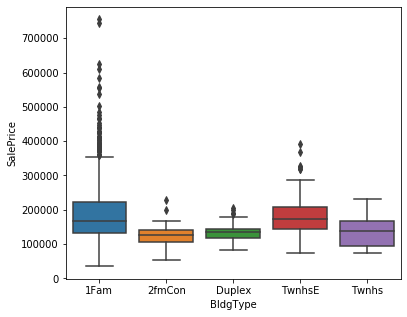

In [205]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['BldgType'], y=df['SalePrice']);

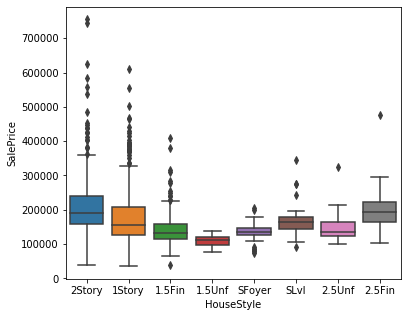

In [206]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['HouseStyle'], y=df['SalePrice']);

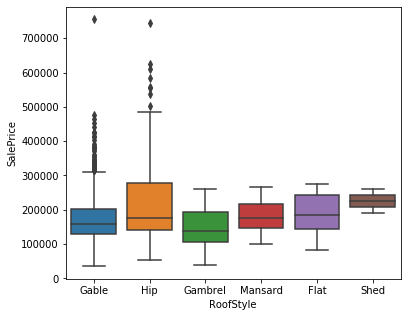

In [207]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['RoofStyle'], y=df['SalePrice']);

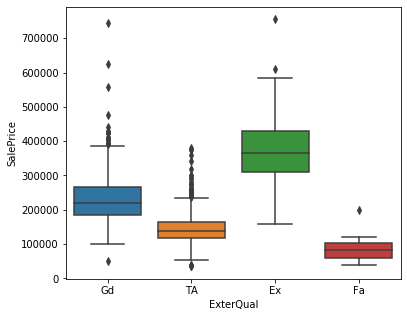

In [208]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['ExterQual'], y=df['SalePrice']);

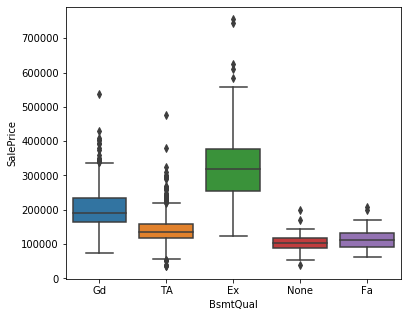

In [209]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['BsmtQual'], y=df['SalePrice']);

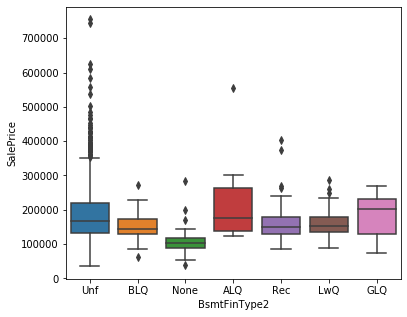

In [210]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['BsmtFinType2'], y=df['SalePrice']);

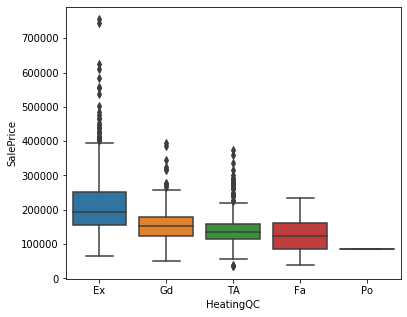

In [211]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['HeatingQC'], y=df['SalePrice']);

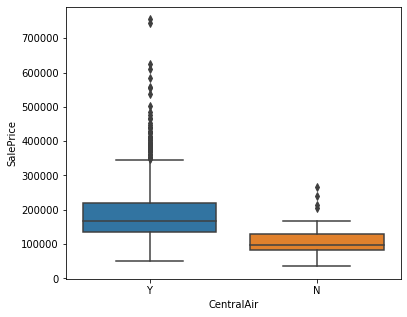

In [212]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['CentralAir'], y=df['SalePrice']);

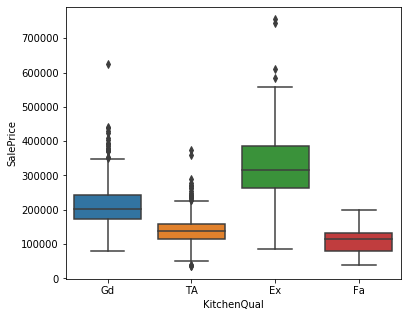

In [213]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['KitchenQual'], y=df['SalePrice']);

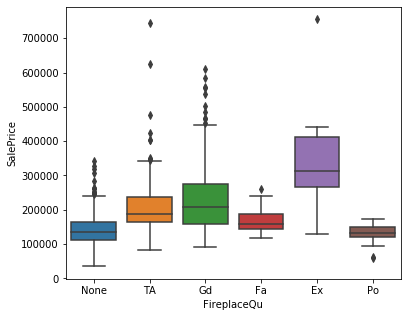

In [214]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['FireplaceQu'], y=df['SalePrice']);

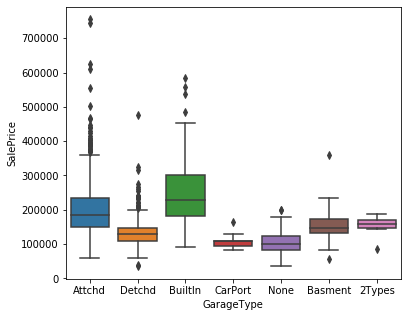

In [215]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['GarageType'], y=df['SalePrice']);

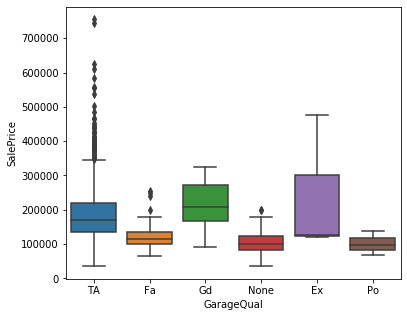

In [216]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['GarageQual'], y=df['SalePrice']);

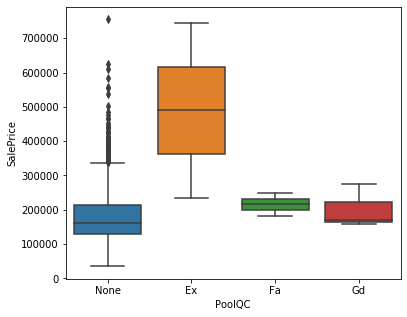

In [217]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['PoolQC'], y=df['SalePrice']);

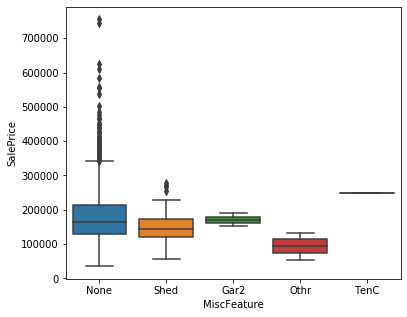

In [218]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['MiscFeature'], y=df['SalePrice']);

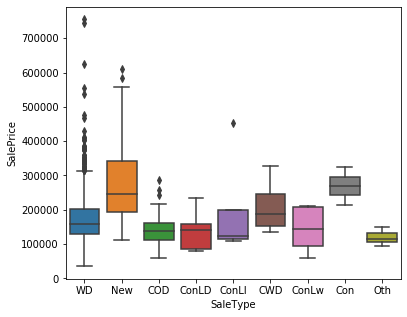

In [219]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['SaleType'], y=df['SalePrice']);

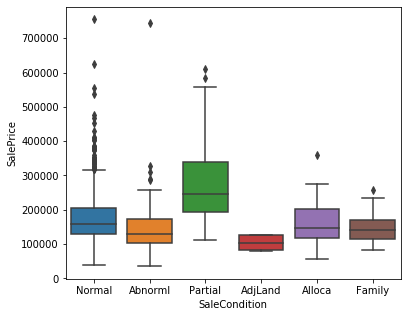

In [220]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['SaleCondition'], y=df['SalePrice']);

## Handling missing values

In [221]:
missing_data

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [222]:
print(df.LotFrontage.mean())
df.LotFrontage.value_counts()

70.04995836802665


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [223]:
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df.LotFrontage.mean())

In [224]:
print(df.GarageYrBlt.mode())
df.GarageYrBlt.value_counts()

0    2005.0
dtype: float64


2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [225]:
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan, '2005.0')

In [226]:
df['GarageYrBlt'].isna().sum()
df.GarageYrBlt = df.GarageYrBlt.astype('float64')

In [227]:
print(df.MasVnrType.mode())
df.MasVnrType.value_counts()

0    None
dtype: object


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [228]:
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'None')

In [229]:
df['MasVnrType'].isna().sum()

0

In [230]:
df.MasVnrArea.value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [231]:
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, '0.0')
df['MasVnrArea'].isna().sum()

0

In [232]:
df.MasVnrArea = df.MasVnrArea.astype('float64')

In [233]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [234]:
df['Electrical'] = df['Electrical'].replace(np.nan, 'SBrkr')
df['Electrical'].isna().sum()

0

In [235]:
type_df = df.dtypes

In [236]:
num_train = type_df[(type_df == 'int64') | (type_df == 'float')]
num_train

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [237]:
cat_train = type_df[(type_df == 'object')]
cat_train

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [238]:
numerical_values_train = list(num_train.index)
numerical_values_train

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [239]:
categorical_values_train = list(cat_train.index)
categorical_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Data Preparation

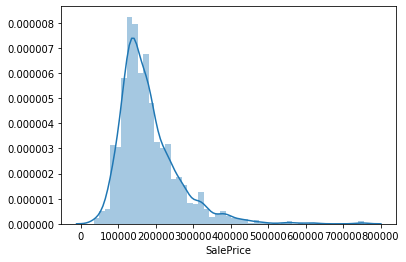

In [240]:
sns.distplot(df['SalePrice']);

The Target Variable is right skewed. One of the best ways to remove the skewness and make it symmetric is to go for log transform(natural log) or power transform.

Lets go for log transform.

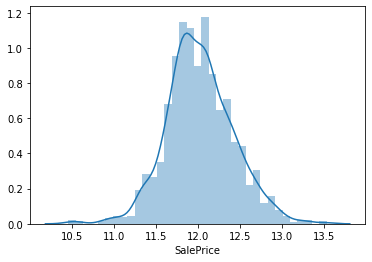

In [241]:
sns.distplot(np.log(df['SalePrice']));

Now the Target variable appers to have a Normal Distribution.

In [242]:
df['TransformPrice'] = np.log(df['SalePrice'])

In [243]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,12.429216


In [244]:
df[['SalePrice','TransformPrice']].describe()

,SalePrice,TransformPrice
count,1460.000000,1460.000000
mean,180921.195890,12.024051
std,79442.502883,0.399452
min,34900.000000,10.460242
25%,129975.000000,11.775097
50%,163000.000000,12.001505
75%,214000.000000,12.273731
max,755000.000000,13.534473


### We can see that there are some year columns, we will convert them to age from present to get more useful information

In [245]:
df['HouseAge'] = 2021-df['YearBuilt']

In [246]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformPrice,HouseAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12.247694,18
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,12.109011,45
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12.317167,20
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398,106
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,12.429216,21


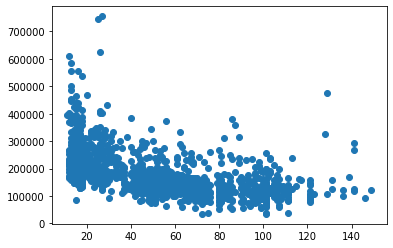

In [247]:
plt.scatter(x=df['HouseAge'], y=df['SalePrice']);

In [248]:
df['AgeRemodAdd'] = 2021-df['YearRemodAdd']

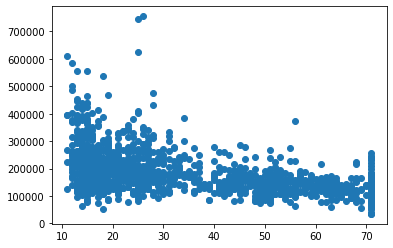

In [249]:
plt.scatter(x=df['AgeRemodAdd'], y=df['SalePrice']);

In [250]:
df['GarageAge'] = 2021-df['GarageYrBlt']

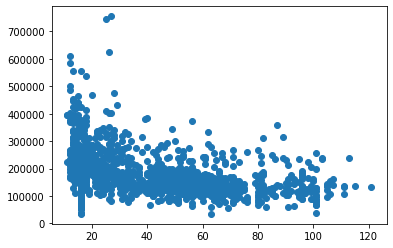

In [251]:
plt.scatter(x=df['GarageAge'], y=df['SalePrice']);

In [252]:
df['LastSold'] = 2021-df['YrSold']

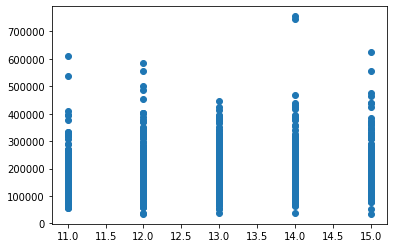

In [253]:
plt.scatter(x=df['LastSold'], y=df['SalePrice']);

In [254]:
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [255]:
cat_train = type_df[(type_df == 'object')]
cat_train
categorical_values_train = list(cat_train.index)

categorical_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [256]:
for i in categorical_values_train:
    feature_set = set(df[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df.loc[df[i] == j,i] = feature_list.index(j)

In [257]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformPrice,HouseAge,AgeRemodAdd,GarageAge,LastSold
0,1,60,3,65.0,8450,1,2,0,2,0,2,2,1,5,4,1,0,7,5,2003,2003,5,6,13,13,0,196.0,0,1,4,2,1,0,4,706,3,0,150,856,4,4,1,2,856,854,0,1710,1,0,2,1,3,1,0,8,4,0,3,6,2003.0,2,2,548,1,1,2,0,61,0,0,0,0,1,3,2,0,2,2008,8,3,208500,12.247694,18,18,18.0,13
1,2,20,3,80.0,9600,1,2,0,2,0,3,2,14,0,4,1,5,6,8,1976,1976,5,6,3,3,1,0.0,3,1,3,2,1,1,6,978,3,0,284,1262,4,4,1,2,1262,0,0,1262,0,1,2,0,3,1,3,6,4,1,1,6,1976.0,2,2,460,1,1,2,298,0,0,0,0,0,1,3,2,0,5,2007,8,3,181500,12.109011,45,45,45.0,14
2,3,60,3,68.0,11250,1,2,2,2,0,2,2,1,5,4,1,0,7,5,2001,2002,5,6,13,13,0,162.0,0,1,4,2,1,3,4,486,3,0,434,920,4,4,1,2,920,866,0,1786,1,0,2,1,3,1,0,6,4,1,1,6,2001.0,2,2,608,1,1,2,0,42,0,0,0,0,1,3,2,0,9,2008,8,3,223500,12.317167,20,19,20.0,13
3,4,70,3,60.0,9550,1,2,2,2,0,4,2,9,5,4,1,0,7,5,1915,1970,5,6,4,15,1,0.0,3,1,5,1,2,0,6,216,3,0,540,756,4,2,1,2,961,756,0,1717,1,0,1,0,3,1,0,7,4,1,2,1,1998.0,3,3,642,1,1,2,0,35,272,0,0,0,1,3,2,0,2,2006,8,4,140000,11.849398,106,51,23.0,15
4,5,60,3,84.0,14260,1,2,2,2,0,3,2,2,5,4,1,0,8,5,2000,2000,5,6,13,13,0,350.0,0,1,4,2,1,4,4,655,3,0,490,1145,4,4,1,2,1145,1053,0,2198,1,0,2,1,4,1,0,9,4,1,1,6,2000.0,2,3,836,1,1,2,192,84,0,0,0,0,1,3,2,0,12,2008,8,3,250000,12.429216,21,21,21.0,13


In [258]:
df[categorical_values_train].head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,0,2,0,2,2,1,5,4,1,0,5,6,13,13,0,0,1,4,2,1,0,4,3,4,4,1,2,0,4,3,6,2,1,1,2,1,3,2,8,3
1,3,1,2,0,2,0,3,2,14,0,4,1,5,5,6,3,3,1,3,1,3,2,1,1,6,3,4,4,1,2,3,4,1,6,2,1,1,2,1,3,2,8,3
2,3,1,2,2,2,0,2,2,1,5,4,1,0,5,6,13,13,0,0,1,4,2,1,3,4,3,4,4,1,2,0,4,1,6,2,1,1,2,1,3,2,8,3
3,3,1,2,2,2,0,4,2,9,5,4,1,0,5,6,4,15,1,3,1,5,1,2,0,6,3,4,2,1,2,0,4,2,1,3,1,1,2,1,3,2,8,4
4,3,1,2,2,2,0,3,2,2,5,4,1,0,5,6,13,13,0,0,1,4,2,1,4,4,3,4,4,1,2,0,4,1,6,2,1,1,2,1,3,2,8,3
5,3,1,2,2,2,0,2,2,20,5,4,1,1,5,6,13,13,1,3,1,1,2,1,0,4,3,4,4,1,2,3,4,3,6,3,1,1,2,1,4,0,8,3
6,3,1,2,0,2,0,2,2,4,5,4,1,5,5,6,13,13,3,0,1,4,4,1,4,4,3,4,4,1,2,0,4,2,6,2,1,1,2,1,3,2,8,3
7,3,1,2,2,2,0,4,2,6,3,4,1,0,5,6,8,8,3,3,1,3,2,1,3,6,5,4,4,1,2,3,4,1,6,2,1,1,2,1,3,0,8,3
8,2,1,2,0,2,0,2,2,24,8,4,1,1,5,6,12,15,1,3,1,5,1,1,0,3,3,4,2,1,4,3,5,1,1,3,0,1,2,1,3,2,8,4
9,3,1,2,0,2,0,4,2,11,8,7,3,4,5,6,3,3,1,3,1,5,1,1,0,4,3,4,4,1,2,3,4,1,6,2,2,1,2,1,3,2,8,3


In [259]:
df['Alley'].value_counts()

2    1369
0      50
1      41
Name: Alley, dtype: int64

In [260]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformPrice,HouseAge,AgeRemodAdd,GarageAge,LastSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,12.024051,49.732192,36.134247,41.023973,13.184247
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.399452,30.202904,20.645407,24.749688,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,10.460242,11.000000,11.000000,11.000000,11.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,11.775097,21.000000,17.000000,18.000000,12.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,12.001505,48.000000,27.000000,36.500000,13.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,12.273731,67.000000,54.000000,59.000000,14.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.0

## Model Building

In [261]:
X = df.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice','TransformPrice'],axis=1)
y = df['TransformPrice']

In [262]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling

In [263]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

array([[-0.86894959,  0.44674467, -0.01366236, ..., -0.87971741,
         0.68694216,  1.36896114],
       [ 0.0689424 ,  0.44674467,  1.20242351, ..., -0.49393273,
        -0.56076188, -1.64954649],
       [-0.63447659, -1.20750552, -0.62170529, ...,  1.67610609,
         2.13588878, -1.64954649],
       ...,
       [ 0.0689424 , -2.86175572, -0.23082055, ..., -1.07260975,
        -1.0839926 , -0.14029267],
       [-0.1655306 ,  0.44674467, -0.14395727, ..., -0.73504816,
        -1.00349556, -0.89491958],
       [ 0.0689424 ,  0.44674467,  1.46301334, ..., -1.16905592,
        -1.16448963, -0.89491958]])

## Feature Selection Using RFE

In [264]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Passing 35 as column for RFE selection


In [265]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 35) 
rfe = rfe.fit(X_train, y_train)

In [266]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 19),
 ('MSZoning', False, 3),
 ('LotFrontage', False, 28),
 ('LotArea', False, 44),
 ('Street', False, 14),
 ('Alley', False, 20),
 ('LotShape', True, 1),
 ('LandContour', True, 1),
 ('Utilities', True, 1),
 ('LotConfig', False, 6),
 ('LandSlope', True, 1),
 ('Neighborhood', False, 36),
 ('Condition1', False, 11),
 ('Condition2', True, 1),
 ('BldgType', True, 1),
 ('HouseStyle', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('RoofStyle', True, 1),
 ('RoofMatl', True, 1),
 ('Exterior1st', False, 8),
 ('Exterior2nd', False, 7),
 ('MasVnrType', False, 9),
 ('MasVnrArea', False, 42),
 ('ExterQual', True, 1),
 ('ExterCond', True, 1),
 ('Foundation', False, 25),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', False, 17),
 ('BsmtFinType1', False, 10),
 ('BsmtFinSF1', False, 40),
 ('BsmtFinType2', False, 15),
 ('BsmtFinSF2', False, 43),
 ('BsmtUnfSF', False, 45),
 ('TotalBsmtSF', False, 37),
 ('Heating', True, 1),
 ('HeatingQC', True,

In [267]:
X_train.columns[rfe.support_]

Index(['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageCars', 'PavedDrive', 'PoolQC', 'SaleCondition'],
      dtype='object')

In [268]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,LotShape,LandContour,Utilities,LandSlope,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,ExterQual,ExterCond,BsmtQual,BsmtCond,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageCars,PavedDrive,PoolQC,SaleCondition
135,0,2,0,2,4,1,5,7,6,2,6,3,1,1,1,4,2,1,2,0,0,2,0,3,1,3,7,4,1,2,6,2,2,1,3
1452,0,2,0,2,4,4,7,5,5,5,6,3,1,2,1,4,2,1,2,1,0,1,0,2,1,3,5,4,0,3,4,2,2,1,3
762,0,2,0,2,4,1,0,7,5,5,6,3,1,2,1,4,4,1,2,0,0,2,1,3,1,0,7,4,0,3,6,2,2,1,3
932,2,2,0,2,4,1,5,9,5,2,6,1,1,4,2,4,4,1,2,0,0,2,0,3,1,1,8,4,1,2,6,3,2,1,3
435,3,2,0,2,4,1,0,7,6,5,6,0,1,2,1,4,4,1,2,1,0,2,1,3,1,0,6,4,1,1,6,2,2,1,3


### Linear Regression

Let's now try predicting house prices, a dataset using linear regression.

In [269]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [270]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

10.40280590352517
[ 0.0175184  -0.05254339 -0.2066791  -0.0588832   0.01611488 -0.01650029
  0.00978282  0.08914487  0.03785112 -0.00702959  0.01983296 -0.01574885
 -0.01168514  0.04427346 -0.03192935 -0.00954959  0.0156532   0.09982651
 -0.00644802  0.08921876  0.03501921  0.07255169  0.06101231  0.01163285
 -0.09947263 -0.00748688  0.04004937  0.01283433  0.07465359  0.01162884
  0.01020467  0.09876533  0.02566119  0.13334436 -0.01867548]


In [271]:
from sklearn.metrics import r2_score, mean_squared_error

In [272]:
X_test_rfe = X_test[X_train.columns[rfe.support_]]
X_test_rfe.head()

,LotShape,LandContour,Utilities,LandSlope,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,ExterQual,ExterCond,BsmtQual,BsmtCond,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageCars,PavedDrive,PoolQC,SaleCondition
892,0,2,0,2,4,1,5,6,8,2,6,3,1,1,1,4,1,1,2,0,1,1,0,3,1,3,6,4,0,3,6,1,2,1,3
1105,2,2,0,2,4,1,0,8,5,5,6,0,1,4,1,4,4,1,2,1,0,2,1,3,1,0,9,4,2,1,6,2,2,1,3
413,0,2,0,2,4,1,5,5,6,5,6,3,1,1,1,4,2,1,1,0,0,1,0,2,1,3,5,4,1,2,1,2,2,1,3
522,0,2,0,2,4,1,1,6,7,5,6,3,2,1,1,4,4,1,2,0,0,2,0,3,1,3,7,4,2,2,1,2,2,1,3
1036,2,1,0,2,4,1,5,9,5,2,6,0,1,4,1,4,4,1,2,1,0,2,0,2,1,1,6,4,1,5,6,3,2,1,3


In [273]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train =',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Test =',r2_test_lr)
metric.append(r2_test_lr)

R2 Train = 0.8600949238184852
R2 Test = 0.8414141499256468


## Ridge and Lasso Regression¶
Predicting house prices, using ridge and lasso regression.

In [274]:
# alpha values

params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,
             2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
             20.0,50.0,100.0,500.0,1000.0]
}

In [275]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

### Lasso

In [276]:
# Lasso

lasso = Lasso()
lasso_model_cv = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             return_train_score=True)
lasso_model_cv.fit(X_train_rfe,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=0)

In [277]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013323,0.005878,0.001778,0.001808,0.0001,{'alpha': 0.0001},-0.118482,-0.120958,-0.118173,-0.111435,-0.119587,-0.117727,0.003294,2,-0.108561,-0.106740,-0.108678,-0.109873,-0.108945,-0.108560,0.001020
1,0.006488,0.002484,0.001071,0.001229,0.001,{'alpha': 0.001},-0.117284,-0.120245,-0.119505,-0.112159,-0.111107,-0.116060,0.003758,1,-0.108926,-0.107197,-0.109247,-0.110780,-0.109776,-0.109185,0.001176
2,0.003813,0.003228,0.002438,0.003244,0.01,{'alpha': 0.01},-0.119883,-0.129174,-0.133596,-0.122371,-0.111605,-0.123326,0.007613,3,-0.120013,-0.117888,-0.118808,-0.121294,-0.123046,-0.120210,0.001823
3,0.004987,0.003367,0.002438,0.002950,0.05,{'alpha': 0.05},-0.138302,-0.152864,-0.163024,-0.147944,-0.136432,-0.147713,0.009765,4,-0.148004,-0.142857,-0.143580,-0.146410,-0.149503,-0.146071,0.002536
4,0.005159,0.003608,0.002214,0.003459,0.1,{'alpha': 0.1},-0.157144,-0.168314,-0.185459,-0.162387,-0.155723,-0.165805,0.010779,5,-0.166897,-0.161746,-0.162826,-0.164124,-0.167046,-0.164528,0.002133


In [278]:
lasso_model_cv.best_params_

{'alpha': 0.001}

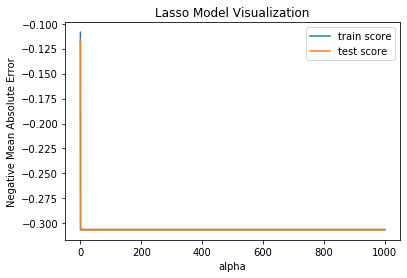

In [279]:
# Plot the mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso Model Visualization")
plt.legend(['train score','test score'], loc='best')
plt.show();

In [280]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [281]:
lasso.coef_

array([ 0.01769194, -0.0504864 , -0.        , -0.04992724,  0.00180438,
       -0.01501825,  0.00839392,  0.09250025,  0.03504319, -0.00659512,
        0.01024185, -0.01462523, -0.        ,  0.04234163, -0.02485653,
       -0.00028394,  0.01563385,  0.08849312, -0.        ,  0.08658533,
        0.01617028,  0.06531585,  0.05413736,  0.01099574, -0.07560913,
       -0.00796617,  0.03950864,  0.00800318,  0.07084375,  0.00714806,
        0.01133042,  0.0996381 ,  0.01997181,  0.00877296, -0.01690878])

In [282]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train =',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Test =',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train =',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test =',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE Train =',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE Test =',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Train = 0.857998808617923
R2 Test = 0.8429785723157076
RSS Train = 22.49522828145451
RSS Test = 11.667480366479651
RMSE Train = 0.022010986576765663
RMSE Test = 0.026638083028492354


## Ridge Regression

In [283]:
# Ridge

ridge = Ridge()
ridge_model_cv = GridSearchCV(estimator=ridge,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             return_train_score=True)
ridge_model_cv.fit(X_train_rfe,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=0)

In [284]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011055,0.004825,0.003839,0.004259,0.0001,{'alpha': 0.0001},-0.118674,-0.121224,-0.118116,-0.111398,-0.120593,-0.118001,0.003498,26,-0.108500,-0.106747,-0.108583,-0.109726,-0.108825,-0.108476,0.000968
1,0.005320,0.001627,0.001067,0.000977,0.001,{'alpha': 0.001},-0.118674,-0.121224,-0.118116,-0.111398,-0.120586,-0.117999,0.003497,25,-0.108501,-0.106747,-0.108584,-0.109726,-0.108825,-0.108476,0.000968
2,0.004264,0.001039,0.001464,0.001037,0.01,{'alpha': 0.01},-0.118673,-0.121223,-0.118116,-0.111398,-0.120509,-0.117984,0.003485,24,-0.108503,-0.106747,-0.108586,-0.109729,-0.108829,-0.108479,0.000969
3,0.002752,0.003684,0.002897,0.002847,0.05,{'alpha': 0.05},-0.118670,-0.121218,-0.118116,-0.111401,-0.120179,-0.117917,0.003437,23,-0.108512,-0.106747,-0.108598,-0.109739,-0.108844,-0.108488,0.000973
4,0.005630,0.001467,0.003136,0.003463,0.1,{'alpha': 0.1},-0.118665,-0.121213,-0.118116,-0.111404,-0.119785,-0.117837,0.003386,22,-0.108522,-0.106748,-0.108611,-0.109751,-0.108862,-0.108499,0.000978


In [285]:
ridge_model_cv.best_params_

{'alpha': 10.0}

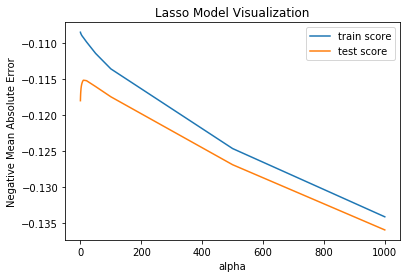

In [286]:
# Plot the mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso Model Visualization")
plt.legend(['train score','test score'], loc='best')
plt.show();

In [287]:
alpha = 10.0

ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [288]:
ridge.coef_

array([ 0.01797886, -0.05181925, -0.01828673, -0.05435217,  0.01434339,
       -0.01655662,  0.00904166,  0.09074591,  0.03721736, -0.00734553,
        0.01896629, -0.01563249, -0.00893387,  0.04419874, -0.03083442,
       -0.00680271,  0.01627433,  0.08741128, -0.00629693,  0.08676747,
        0.02849675,  0.06720522,  0.05837649,  0.01224934, -0.07949521,
       -0.00809878,  0.039252  ,  0.01188128,  0.07294601,  0.00969192,
        0.0110682 ,  0.09755891,  0.02602528,  0.06068626, -0.01835583])

In [289]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train =',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Test =',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train =',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test =',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE Train =',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE Test =',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 Train = 0.8593380804236143
R2 Test = 0.8429783977941478
RSS Train = 22.283066505157308
RSS Test = 11.66749333430769
RMSE Train = 0.021803391883715564
RMSE Test = 0.026638112635405685


In [290]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [291]:
betas.rows = X.columns

In [292]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [293]:
betas

,Linear,Ridge,Lasso
LotShape,0.017518,0.017979,0.017692
LandContour,-0.052543,-0.051819,-0.050486
Utilities,-0.206679,-0.018287,-0.000000
LandSlope,-0.058883,-0.054352,-0.049927
Condition2,0.016115,0.014343,0.001804
BldgType,-0.016500,-0.016557,-0.015018
HouseStyle,0.009783,0.009042,0.008394
OverallQual,0.089145,0.090746,0.092500
OverallCond,0.037851,0.037217,0.035043
RoofStyle,-0.007030,-0.007346,-0.006595


### 5 best predictor variables identified after performing both Lasso and Ridge regression are
1. OverallQual
2. CentralAir
3. KitchenAbvGr
4. GarageCars
5. FullBath

### Rebuild Lasso model excluding 5 most important variable

In [294]:
X_train_rfe.columns
X_train_rfe_check = X_train_rfe.drop(['OverallQual','CentralAir','KitchenAbvGr','GarageCars','FullBath'], axis=1)
X_train_rfe_check.head()

,LotShape,LandContour,Utilities,LandSlope,Condition2,BldgType,HouseStyle,OverallCond,RoofStyle,RoofMatl,ExterQual,ExterCond,BsmtQual,BsmtCond,Heating,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,PavedDrive,PoolQC,SaleCondition
135,0,2,0,2,4,1,5,6,2,6,3,1,1,1,4,2,2,0,0,0,3,3,7,4,1,2,6,2,1,3
1452,0,2,0,2,4,4,7,5,5,6,3,1,2,1,4,2,2,1,0,0,2,3,5,4,0,3,4,2,1,3
762,0,2,0,2,4,1,0,5,5,6,3,1,2,1,4,4,2,0,0,1,3,0,7,4,0,3,6,2,1,3
932,2,2,0,2,4,1,5,5,2,6,1,1,4,2,4,4,2,0,0,0,3,1,8,4,1,2,6,2,1,3
435,3,2,0,2,4,1,0,6,5,6,0,1,2,1,4,4,2,1,0,1,3,0,6,4,1,1,6,2,1,3


In [295]:
X_test_rfe.columns
X_test_rfe_check = X_test_rfe.drop(['OverallQual','CentralAir','KitchenAbvGr','GarageCars','FullBath'], axis=1)
X_test_rfe_check.head()

,LotShape,LandContour,Utilities,LandSlope,Condition2,BldgType,HouseStyle,OverallCond,RoofStyle,RoofMatl,ExterQual,ExterCond,BsmtQual,BsmtCond,Heating,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,PavedDrive,PoolQC,SaleCondition
892,0,2,0,2,4,1,5,8,2,6,3,1,1,1,4,1,2,0,1,0,3,3,6,4,0,3,6,2,1,3
1105,2,2,0,2,4,1,0,5,5,6,0,1,4,1,4,4,2,1,0,1,3,0,9,4,2,1,6,2,1,3
413,0,2,0,2,4,1,5,6,5,6,3,1,1,1,4,2,1,0,0,0,2,3,5,4,1,2,1,2,1,3
522,0,2,0,2,4,1,1,7,5,6,3,2,1,1,4,4,2,0,0,0,3,3,7,4,2,2,1,2,1,3
1036,2,1,0,2,4,1,5,5,2,6,0,1,4,1,4,4,2,1,0,0,2,1,6,4,1,5,6,2,1,3


In [296]:
# Lasso

lasso = Lasso()
lasso_model_cv = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             return_train_score=True)
lasso_model_cv.fit(X_train_rfe_check,y_train)

cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010362,0.004981,0.003448,0.003834,0.0001,{'alpha': 0.0001},-0.143823,-0.154044,-0.154576,-0.143151,-0.154638,-0.150046,0.005364,2,-0.142720,-0.140195,-0.140381,-0.143284,-0.142432,-0.141802,0.001268
1,0.004670,0.003658,0.003847,0.003651,0.001,{'alpha': 0.001},-0.143535,-0.152819,-0.154061,-0.144257,-0.145909,-0.148116,0.004432,1,-0.142463,-0.140299,-0.140643,-0.143193,-0.142607,-0.141841,0.001150
2,0.004731,0.002567,0.000979,0.001335,0.01,{'alpha': 0.01},-0.145594,-0.154717,-0.163080,-0.151580,-0.139788,-0.150952,0.007937,3,-0.148236,-0.144658,-0.145789,-0.148378,-0.148854,-0.147183,0.001652
3,0.003007,0.002480,0.001651,0.002346,0.05,{'alpha': 0.05},-0.162983,-0.177214,-0.195059,-0.173335,-0.156648,-0.173048,0.013208,4,-0.173809,-0.169399,-0.168392,-0.171309,-0.174344,-0.171450,0.002346
4,0.003959,0.003645,0.000199,0.000398,0.1,{'alpha': 0.1},-0.185066,-0.196153,-0.217587,-0.191137,-0.173280,-0.192644,0.014623,5,-0.193786,-0.189277,-0.188239,-0.190130,-0.194735,-0.191233,0.002561


In [297]:
lasso_model_cv.best_params_

{'alpha': 0.001}

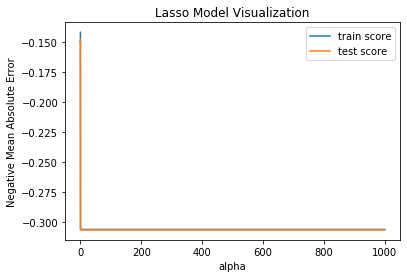

In [298]:
# Plot the mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso Model Visualization")
plt.legend(['train score','test score'], loc='best')
plt.show();

In [299]:
alpha = 0.001

In [300]:
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe_check, y_train)

lasso.coef_

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe_check)
y_pred_test = lasso.predict(X_test_rfe_check)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7728822725201621
0.7639231354069679
35.9790300116382
17.54169620822277
0.03520453034406869
0.040049534721969794


In [301]:
betas1 = pd.DataFrame(index=X_train_rfe_check.columns)

In [302]:
betas1.rows = X.columns

In [303]:
betas1['Lasso'] = lasso.coef_

In [304]:
betas1

,Lasso
LotShape,0.021310
LandContour,-0.061581
Utilities,-0.000000
LandSlope,-0.024124
Condition2,0.000000
BldgType,-0.009321
HouseStyle,0.007664
OverallCond,0.047074
RoofStyle,-0.015848
RoofMatl,0.000000
